In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [64]:
''' SQL Query
SELECT TOP 300000
    s.plate,
    s.mjd,
    s.fiberid,
    s.specobjid,
    s.ra,
    s.dec,
    s.z as redshift,
    s.class,
    l.subclass,
    g.oiii_5007_flux,
    g.nii_6584_flux,
    g.h_alpha_flux,
    g.h_beta_flux,
    g.sii_6717_flux,
    g.sii_6731_flux,
    g.oi_6300_flux,
    g.h_alpha_eqw
FROM
    GalSpecLine AS g
JOIN
    specObj AS s ON g.specobjid = s.specobjid
JOIN 
    GalSpecInfo AS l ON g.specobjid = l.specobjid 
WHERE
    s.class = 'GALAXY'
    AND s.z < 0.35
    AND g.sigma_balmer*2.35<500
'''
gal_data = pd.read_csv('/mnt/c/Synced/Projects/AGNs/Project/SDSS.csv', low_memory=False)
gal_data

,plate,mjd,fiberid,specobjid,ra,dec,redshift,class,subclass,oiii_5007_flux,nii_6584_flux,h_alpha_flux,h_beta_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,h_alpha_eqw
0,266,51630,1,299489677444933632,146.71421,-1.041304,0.021222,GALAXY,STARFORMING,68.396060,224.113600,472.590400,119.495600,124.711500,84.180530,18.594930,-5.588495
1,266,51630,2,299489952322840576,146.74413,-0.652191,0.203783,GALAXY,NaN,5.172892,-2.430531,3.417222,6.602319,-3.692427,-0.496555,3.155121,-0.247270
2,266,51630,4,299490502078654464,146.62857,-0.765137,0.064656,GALAXY,STARFORMING,21.444370,51.591550,99.400050,25.640470,35.334970,21.657780,8.490424,-5.130115
3,266,51630,6,299491051834468352,146.63167,-0.988278,0.052654,GALAXY,STARFORMING,35.466710,25.789630,127.305800,38.332260,30.269960,25.722970,6.269853,-21.187690
4,266,51630,7,299491326712375296,146.91945,-0.990492,0.213861,GALAXY,NaN,8.564038,13.526680,13.323240,7.017897,6.758259,4.062315,4.218018,-1.839458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1291,52738,558,1453690207541946368,227.19335,42.176938,0.068631,GALAXY,STARFORMING,12.073880,118.903300,290.853900,58.098910,41.547190,34.801980,6.765205,-21.161660
299996,1291,52738,561,1453691032175667200,227.20240,42.569609,0.064557,GALAXY,AGN,159.517700,135.539800,133.917100,30.200690,43.405700,43.480900,17.627370,-6.748077
299997,1291,52738,562,1453691307053574144,227.02928,42.754628,0.295480,GALAXY,NaN,3.750600,13.438600,3.818331,5.982980,-0.846908,-9.799622,-3.126495,-0.505363
299998,1291,52738,564,1453691856809388032,227.14026,42.538214,0.313018,GALAXY,NaN,4.183057,4.851635,6.889622,1.785445,-1.913484,28.923140,4.941086,-1.370473


In [65]:
''' SQL Query (WISE)
SELECT
s.plate, s.mjd, s.fiberid, s.z as redshift, g.subclass,
w.w1mpro as w1, w.w2mpro as w2, w.w3mpro as w3, w.w1flux, w.w2flux, w.w3flux
FROM SpecObjAll AS s
JOIN GalSpecInfo AS g ON s.specobjid = g.specobjid 
JOIN GalSpecLine AS l ON s.specobjid = l.specobjid	
JOIN wise_xmatch AS x ON s.bestobjid = x.sdss_objid
JOIN wise_allsky AS w ON x.wise_cntr = w.cntr
WHERE s.class = "GALAXY"
AND s.z < 0.35
AND (l.sigma_balmer * 2.355) < 500
AND x.match_dist <= 3
AND w.w1snr > 5
AND w.w2snr > 5
AND w.w3snr > 5
AND w.w1flux/w.w1sigflux > 5
AND w.w2flux/w.w2sigflux > 5
AND w.w3flux/w.w3sigflux > 5
'''
gal_data_wise = pd.read_csv('/mnt/c/Synced/Projects/AGNs/Project/WISE.csv')
# Let's cross math plate, mjd, fiberid between the 2 dataframes
crossmatched = pd.merge(gal_data, gal_data_wise, on=['plate', 'mjd', 'fiberid'])
# Only some 20000 bois left now
crossmatched

,plate,mjd,fiberid,specobjid,ra,dec,redshift_x,class,subclass_x,oiii_5007_flux,...,oi_6300_flux,h_alpha_eqw,redshift_y,subclass_y,w1,w2,w3,w1flux,w2flux,w3flux
0,399,51817,184,449284670849312768,20.772234,-0.426205,0.077529,GALAXY,NaN,3.718490,...,0.793973,-14.224420,0.077529,NaN,14.709,14.623,10.929,207.13,89.261,673.77
1,399,51817,185,449284945727219712,20.807131,-0.385302,0.024891,GALAXY,STARBURST,76.636000,...,29.200240,-48.210100,0.024891,STARBURST,12.447,12.365,8.405,1664.40,714.800,6884.60
2,399,51817,189,449286045238847488,20.883865,-0.213382,0.043620,GALAXY,NaN,10.961450,...,5.127994,-2.027967,0.043620,NaN,12.616,12.592,10.524,1424.80,579.940,978.14
3,399,51817,190,449286320116754432,21.032918,-0.532578,0.093567,GALAXY,STARFORMING,20.532420,...,12.887120,-8.441671,0.093567,STARFORMING,13.825,13.673,10.908,467.92,214.150,686.59
4,399,51817,191,449286594994661376,20.812343,-0.330242,0.076740,GALAXY,STARFORMING,96.923730,...,15.200980,-19.710480,0.076740,STARFORMING,13.170,12.872,9.016,855.37,448.020,3923.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20656,1242,52901,226,1398429855376238592,57.142385,-0.666429,0.046781,GALAXY,STARFORMING,27.255690,...,11.522270,-27.361560,0.046781,STARFORMING,14.126,13.875,10.100,354.63,177.750,1445.40
20657,1242,52901,230,1398430954887866368,57.043763,-0.692232,0.130272,GALAXY,STARFORMING,14.265330,...,6.597705,-20.401390,0.130272,STARFORMING,14.314,14.012,10.251,298.12,156.710,1258.00
20658,1242,52901,232,1398431504643680256,57.154676,-0.463413,0.160737,GALAXY,NaN,3.249155,...,-4.598965,-15.045210,0.160737,NaN,14.954,14.699,10.845,165.38,83.272,727.62
20659,1242,52901,236,1398432604155308032,57.074950,-0.502928,0.131550,GALAXY,STARFORMING,15.324390,...,4.474465,-15.065760,0.131550,STARFORMING,14.764,14.362,11.038,197.04,113.570,609.42


In [76]:
# We're only going to use the crossmatched data so we can compare all the results
gal_data = crossmatched
# Also we're going to join the redshifts values from the different catalogs and only keep SDSS ones
gal_data['redshift'] = gal_data['redshift_x']
# Same for subclass
gal_data['subclass'] = gal_data['subclass_x']

/home/iuliu/anaconda3/envs/agn/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/iuliu/anaconda3/envs/agn/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


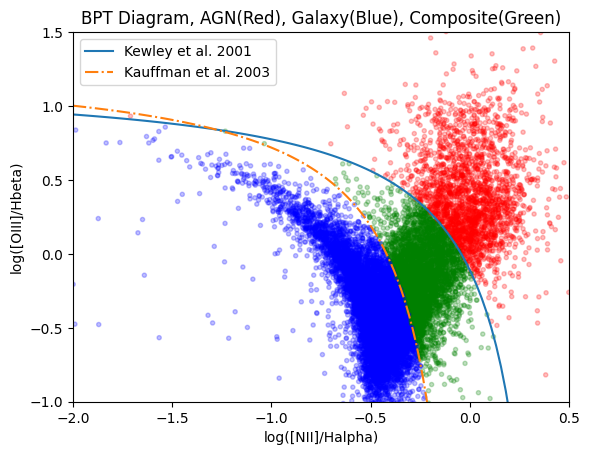

AGN: 2482
GALAXY: 13468
COMPOSITE: 4711


In [70]:
# Using standard BPT diagnostic
# Theory lines from Kewley et al. 2001
def th_kewl_2001_nii(log_nii_ha):
    return 0.61/(log_nii_ha - 0.47) + 1.19
x = np.linspace(-2, 0.4, 100)
plt.plot(x, th_kewl_2001_nii(x), label='Kewley et al. 2001')

# Empirical lines from Kauffman et al. 2003
def emp_kauf_2003(log_nii_ha):
    return 0.61/(log_nii_ha - 0.05) + 1.3
x = np.linspace(-2, -0.2, 100)
plt.plot(x, emp_kauf_2003(x), '-.', label='Kauffman et al. 2003')

x_data = np.log10(gal_data['nii_6584_flux']/gal_data['h_alpha_flux'])
y_data = np.log10(gal_data['oiii_5007_flux']/gal_data['h_beta_flux'])

def BPT_classifier(log_nii_ha, log_oiii_hb):
    agn = np.logical_or(log_oiii_hb > th_kewl_2001_nii(log_nii_ha), log_nii_ha > 0.2) # Added to fix the function's asymptotic behaivour, so far right points aren't misclassified
    galaxy = np.logical_and(log_oiii_hb < emp_kauf_2003(log_nii_ha), log_nii_ha < -0.2) # Same reason as above
    composite = np.logical_and(~agn, ~galaxy)
    classifications = np.select([agn, galaxy, composite], ['AGN', 'GALAXY', 'COMPOSITE'])
    return classifications

# Classify the data
classifications = BPT_classifier(x_data, y_data)

# Map classifications to colors
colors = {'AGN': 'red', 'GALAXY': 'blue', 'COMPOSITE': 'green'}
color_map = [colors[cls] for cls in classifications]

# Plot the classified data with different colors
plt.scatter(x_data, y_data, c=color_map, marker='.', alpha=0.25)

plt.xlabel('log([NII]/Halpha)')
plt.ylabel('log([OIII]/Hbeta)')
plt.xlim(-2, 0.5)
plt.ylim(-1, 1.5)
plt.title('BPT Diagram, AGN(Red), Galaxy(Blue), Composite(Green)')
plt.legend()
plt.show()

# Print number of each classification
print('AGN:', np.sum(classifications == 'AGN'))
print('GALAXY:', np.sum(classifications == 'GALAXY'))
print('COMPOSITE:', np.sum(classifications == 'COMPOSITE'))

# Add a column to the dataframe with the classifications for this classification scheme
gal_data['BPT_class'] = classifications

/tmp/ipykernel_15117/3687000928.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


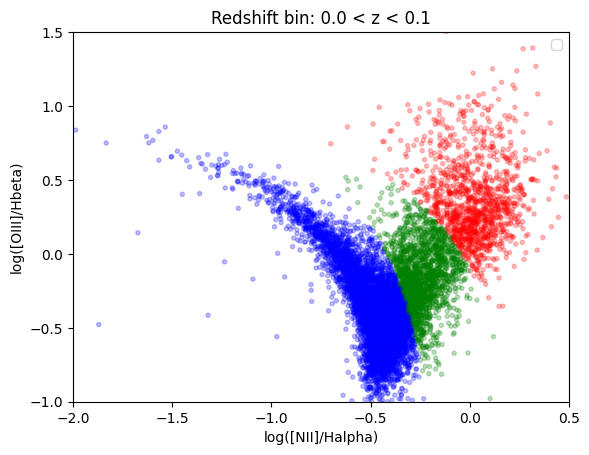

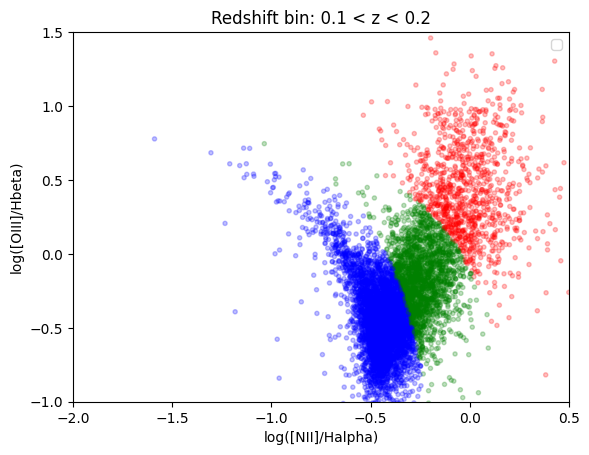

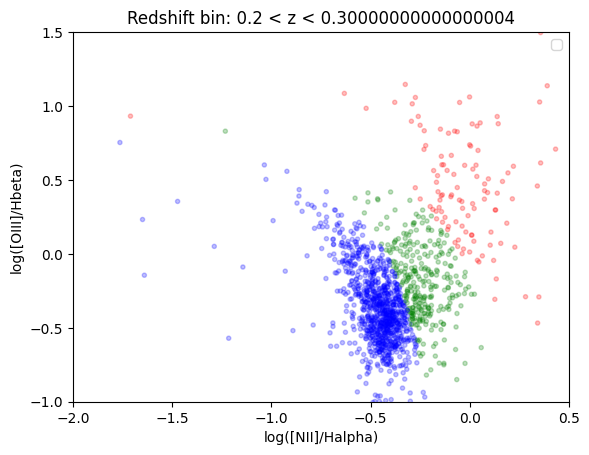

In [71]:
# Next, we'll use redshift bins, size delta_z = 0.05, and perform the same classification for each redshift bin

# Define the redshift bins
z_bins = np.arange(0, 0.3501, 0.1)
for i in range(len(z_bins)-1):
    z_min = z_bins[i]
    z_max = z_bins[i+1]
    z_mask = np.logical_and(gal_data['redshift'] > z_min, gal_data['redshift'] < z_max)
    x_data = np.log10(gal_data['nii_6584_flux'][z_mask]/gal_data['h_alpha_flux'][z_mask])
    y_data = np.log10(gal_data['oiii_5007_flux'][z_mask]/gal_data['h_beta_flux'][z_mask])
    classifications = BPT_classifier(x_data, y_data)
    color_map = [colors[cls] for cls in classifications]
    plt.scatter(x_data, y_data, c=color_map, marker='.', alpha=0.25)
    plt.xlabel('log([NII]/Halpha)')
    plt.ylabel('log([OIII]/Hbeta)')
    plt.xlim(-2, 0.5)
    plt.ylim(-1, 1.5)
    plt.title(f'Redshift bin: {z_min} < z < {z_max}')
    plt.legend()
    plt.show()


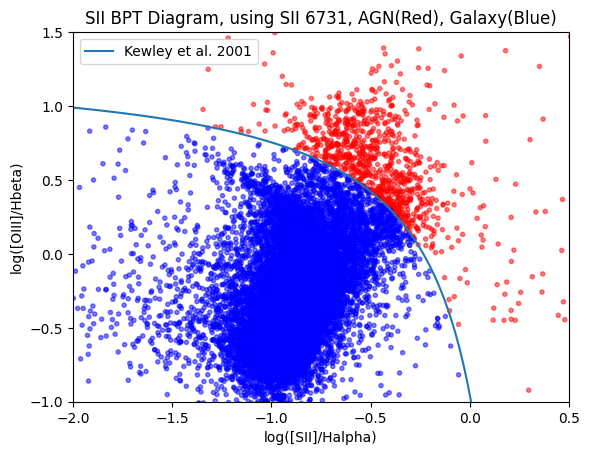

AGN: 1004
GALAXY: 19657


In [72]:
# SII BPT diagram
# Theory lines from Kewley et al. 2001
def th_kewl_2001_sii(log_sii_ha):
    return 0.72/(log_sii_ha - 0.32) + 1.3
x = np.linspace(-2, 0.01, 100)
plt.plot(x, th_kewl_2001_sii(x), label='Kewley et al. 2001')

# x_data = np.log10(gal_data['sii_6717_flux']/gal_data['h_alpha_flux']) # Using SII 6717
x_data = np.log10(gal_data['sii_6731_flux']/gal_data['h_alpha_flux']) # Using SII 6731
y_data = np.log10(gal_data['oiii_5007_flux']/gal_data['h_beta_flux'])

def BPT_classifier(log_sii_ha, log_oiii_hb):
    agn = np.logical_or(log_oiii_hb > th_kewl_2001_sii(log_sii_ha), log_sii_ha > 0.2) # Added to fix the function's asymptotic behaivour, so far right points aren't misclassified
    galaxy = ~agn
    classifications = np.select([agn, galaxy], ['AGN', 'GALAXY'])
    return classifications

# Classify the data
classifications = BPT_classifier(x_data, y_data)

# Map classifications to colors
colors = {'AGN': 'red', 'GALAXY': 'blue'}
color_map = [colors[cls] for cls in classifications]

# Plot the classified data with different colors
plt.scatter(x_data, y_data, c=color_map, marker='.', alpha=0.5)

plt.xlabel('log([SII]/Halpha)')
plt.ylabel('log([OIII]/Hbeta)')
plt.xlim(-2, 0.5)
plt.ylim(-1, 1.5)
# plt.title('SII BPT Diagram, using SII 6717')
plt.title('SII BPT Diagram, using SII 6731, AGN(Red), Galaxy(Blue)')
plt.legend()
plt.show()

# Print number of each classification
print('AGN:', np.sum(classifications == 'AGN'))
print('GALAXY:', np.sum(classifications == 'GALAXY'))

# Add a column to the dataframe with the classifications for this classification scheme
gal_data['SII_BPT_class'] = classifications

/home/iuliu/anaconda3/envs/agn/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/iuliu/anaconda3/envs/agn/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


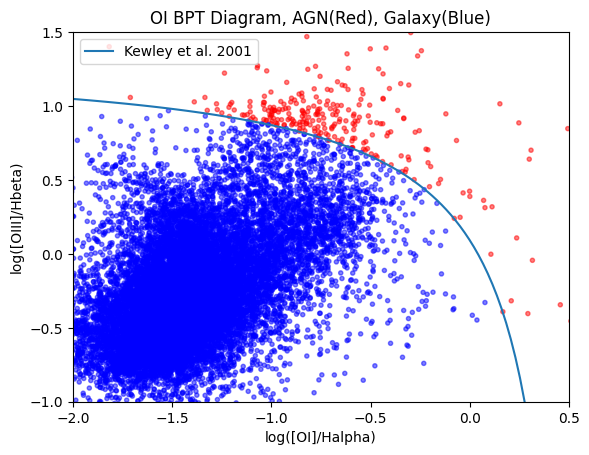

AGN: 342
GALAXY: 20319


In [73]:
# OI BPT diagram
# Theory lines from Kewley et al. 2001
def th_kewl_2001_oi(log_oi_ha):
    return 0.73/(log_oi_ha - 0.59) + 1.33
x = np.linspace(-2, 0.3, 100)
plt.plot(x, th_kewl_2001_oi(x), label='Kewley et al. 2001')

x_data = np.log10(gal_data['oi_6300_flux']/gal_data['h_alpha_flux'])
y_data = np.log10(gal_data['oiii_5007_flux']/gal_data['h_beta_flux'])

def BPT_classifier(log_oi_ha, log_oiii_hb):
    agn = np.logical_or(log_oiii_hb > th_kewl_2001_oi(log_oi_ha), log_oi_ha > 0.2) # Added to fix the function's asymptotic behaivour, so far right points aren't misclassified
    galaxy = ~agn
    classifications = np.select([agn, galaxy], ['AGN', 'GALAXY'])
    return classifications

# Classify the data
classifications = BPT_classifier(x_data, y_data)

# Map classifications to colors
colors = {'AGN': 'red', 'GALAXY': 'blue'}
color_map = [colors[cls] for cls in classifications]

# Plot the classified data with different colors
plt.scatter(x_data, y_data, c=color_map, marker='.', alpha=0.5)

plt.xlabel('log([OI]/Halpha)')
plt.ylabel('log([OIII]/Hbeta)')
plt.xlim(-2, 0.5)
plt.ylim(-1, 1.5)
plt.title('OI BPT Diagram, AGN(Red), Galaxy(Blue)')
plt.legend()
plt.show()

# Print number of each classification
print('AGN:', np.sum(classifications == 'AGN'))
print('GALAXY:', np.sum(classifications == 'GALAXY'))

# Add a column to the dataframe with the classifications for this classification scheme
gal_data['OI_BPT_class'] = classifications

/home/iuliu/anaconda3/envs/agn/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_15117/4199408865.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


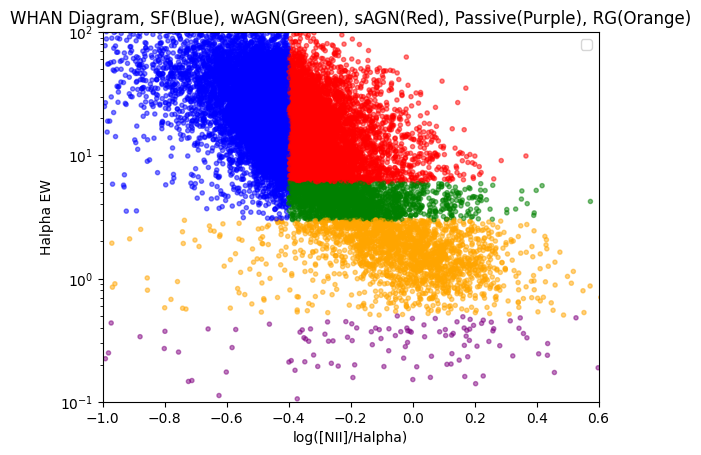

SF: 10365
wAGN: 1911
sAGN: 5924
Passive: 300
RG: 2161


In [74]:
# WHAN diagram
# mask = gal_data['h_alpha_eqw'] < 0 # Negative for absorbtion lines
x_data = np.log10(gal_data['nii_6584_flux']/gal_data['h_alpha_flux'])
y_data = -gal_data['h_alpha_eqw'] # Negative for absorbtion lines

def WHAN_classifier(log_nii_ha, h_alpha_eqw):
    sf = np.logical_and(log_nii_ha < -0.4, h_alpha_eqw > 3) # Star forming
    wagn = np.logical_and(log_nii_ha > -0.4, np.logical_and(h_alpha_eqw > 3, h_alpha_eqw < 6)) # Weak AGN
    sagn = np.logical_and(log_nii_ha > -0.4, h_alpha_eqw > 6) # Strong AGN
    rg = np.logical_and(h_alpha_eqw < 3, h_alpha_eqw > 0.5) # Fake AGN
    passive = np.logical_and(np.logical_and(~sf, ~rg), np.logical_and(~wagn, ~sagn))
    classifications = np.select([sf, wagn, sagn, passive, rg], ['SF', 'wAGN', 'sAGN', 'Passive', 'RG'])
    return classifications

# Classify the data
classifications = WHAN_classifier(x_data, y_data)

# Map classifications to colors
colors = {'SF': 'blue', 'wAGN': 'green', 'sAGN': 'red', 'Passive': 'purple', 'RG': 'orange'}
color_map = [colors[cls] for cls in classifications]

# Plot the classified data with different colors
plt.scatter(x_data, y_data, c=color_map, marker='.', alpha=0.5)

plt.xlabel('log([NII]/Halpha)')
plt.ylabel('Halpha EW')
plt.xlim(-1, 0.6)
plt.yscale('log')
plt.ylim(1e-1, 100)
plt.title('WHAN Diagram, SF(Blue), wAGN(Green), sAGN(Red), Passive(Purple), RG(Orange)')
plt.legend()
plt.show()

# Print number of each classification
print('SF:', np.sum(classifications == 'SF'))
print('wAGN:', np.sum(classifications == 'wAGN'))
print('sAGN:', np.sum(classifications == 'sAGN'))
print('Passive:', np.sum(classifications == 'Passive'))
print('RG:', np.sum(classifications == 'RG'))

# Add a column to the dataframe with the classifications for this classification scheme
gal_data['WHAN_class'] = classifications

In [80]:
# Let's compare the classifications, by finding the number of galaxies that are classified as AGN in all three classification schemes
# AGN in all three
agn_all = np.logical_and(np.logical_and(gal_data['BPT_class'] == 'AGN', gal_data['SII_BPT_class'] == 'AGN'), np.logical_and(gal_data['OI_BPT_class'] == 'AGN', np.logical_or(gal_data['WHAN_class'] == 'wAGN', gal_data['WHAN_class'] == 'sAGN')))
print('AGN in all:', np.sum(agn_all))

# Galaxy in all three
galaxy_all = np.logical_and(np.logical_and(gal_data['BPT_class'] == 'GALAXY', gal_data['SII_BPT_class'] == 'GALAXY'), np.logical_and(gal_data['OI_BPT_class'] == 'GALAXY', np.logical_or(gal_data['WHAN_class'] == 'SF', gal_data['WHAN_class'] == 'Passive')))
print('Galaxy in all:', np.sum(galaxy_all))

# Non-matching classifications
non_matching = np.logical_and(np.logical_and(gal_data['BPT_class'] != gal_data['SII_BPT_class'], gal_data['BPT_class'] != gal_data['OI_BPT_class']), gal_data['BPT_class'] != gal_data['WHAN_class'])
print('Non-matching classifications:', np.sum(non_matching))

# Percentages of correct predictions by the different diagnostics relative to the subclass 
# classification provided by the SDSS database
total_agns = np.sum( gal_data['subclass'] == 'AGN' )
correct_BPT = np.sum( np.logical_and(gal_data['BPT_class'] == 'AGN' , gal_data['subclass'] == 'AGN' )) / total_agns
correct_SII_BPT = np.sum( np.logical_and(gal_data['SII_BPT_class'] == 'AGN', gal_data['subclass'] == 'AGN' )) / total_agns
correct_OI_BPT = np.sum( np.logical_and(gal_data['OI_BPT_class'] == 'AGN', gal_data['subclass'] == 'AGN' )) / total_agns
correct_WHAN = np.sum(  np.logical_and(np.logical_or(gal_data['WHAN_class'] == 'wAGN', gal_data['WHAN_class'] == 'sAGN'), gal_data['subclass'] == 'AGN' ) ) / total_agns
print('Correct BPT:', correct_BPT*100, '%')
print('Correct SII BPT:', correct_SII_BPT*100, '%')
print('Correct OI BPT:', correct_OI_BPT*100, '%')
print('Correct WHAN:', correct_WHAN*100, '%')
# It seems BPT standard and WHAN for the win

AGN in all: 130
Galaxy in all: 10201
Non-matching classifications: 6245
Correct BPT: 90.18003273322422 %
Correct SII BPT: 45.171849427168574 %
Correct OI BPT: 15.711947626841244 %
Correct WHAN: 89.19803600654664 %


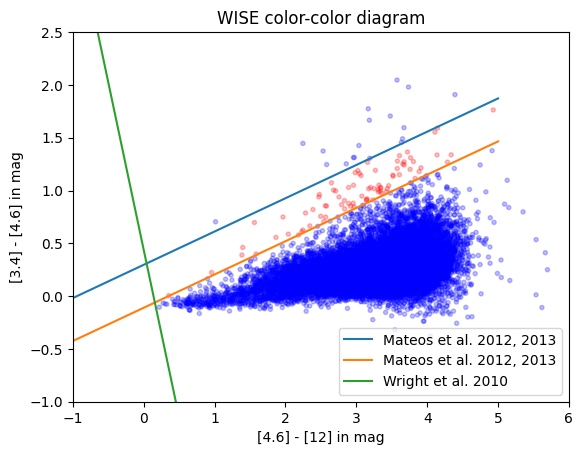

AGN: 81
GALAXY: 20580


In [83]:
# WISE filters 3.4, 4.6, 12 microns are the w1, w2, w3 columns respectively
x = crossmatched['w2'] - crossmatched['w3']
y = crossmatched['w1'] - crossmatched['w2']

def fa(x): # Lower than this AGN
    return 0.315*x + 0.297
def fb(x): # Higher than this AGN
    return 0.315*x - 0.110
def f2(x): # Right of this AGN
    return -3.172*x + 0.436

def WISE_classifier(w1, w2, w3):
    x, y = w2 - w3, w1 - w2
    agn = np.logical_and(y < fa(x), y > fb(x)) # this is enough as all data is right of vertical 0 anyway
    galaxy = ~agn
    return np.select([agn, galaxy], ['AGN', 'GALAXY'])

# Classify the data
classifications = WISE_classifier(crossmatched['w1'], crossmatched['w2'], crossmatched['w3'])

# Map classifications to colors
colors = {'AGN': 'red', 'GALAXY': 'blue'}
color_map = [colors[cls] for cls in classifications]

x1 = np.linspace(-1, 5, 100)
plt.plot(x1, fa(x1), label='Mateos et al. 2012, 2013')
plt.plot(x1, fb(x1), label='Mateos et al. 2012, 2013')
plt.plot(x1, f2(x1), label='Wright et al. 2010')
# Plot the classified data with different colors
plt.scatter(x, y, c=color_map, marker='.', alpha=0.25)

plt.xlabel('[4.6] - [12] in mag')
plt.ylabel('[3.4] - [4.6] in mag')
plt.title('WISE color-color diagram')
plt.xlim(-1, 6)
plt.ylim(-1, 2.5)
plt.legend()
plt.show()

# Print number of each classification
print('AGN:', np.sum(classifications == 'AGN'))
print('GALAXY:', np.sum(classifications == 'GALAXY'))

# Add a column to the dataframe with the classifications for this classification scheme
crossmatched['WISE_class'] = classifications

In [84]:
# Percentages of correct predictions by the different diagnostics relative to the subclass 
# classification provided by the SDSS database
total_agns = np.sum( gal_data['subclass'] == 'AGN' )
correct_BPT = np.sum( np.logical_and(gal_data['BPT_class'] == 'AGN' , gal_data['subclass'] == 'AGN' )) / total_agns
correct_SII_BPT = np.sum( np.logical_and(gal_data['SII_BPT_class'] == 'AGN', gal_data['subclass'] == 'AGN' )) / total_agns
correct_OI_BPT = np.sum( np.logical_and(gal_data['OI_BPT_class'] == 'AGN', gal_data['subclass'] == 'AGN' )) / total_agns
correct_WHAN = np.sum(  np.logical_and(np.logical_or(gal_data['WHAN_class'] == 'wAGN', gal_data['WHAN_class'] == 'sAGN'), gal_data['subclass'] == 'AGN' ) ) / total_agns
correct_WISE = np.sum( np.logical_and(crossmatched['WISE_class'] == 'AGN', gal_data['subclass'] == 'AGN' )) / total_agns
print('Correct BPT:', correct_BPT*100, '%')
print('Correct SII BPT:', correct_SII_BPT*100, '%')
print('Correct OI BPT:', correct_OI_BPT*100, '%')
print('Correct WHAN:', correct_WHAN*100, '%')
print('Correct WISE:', correct_WISE*100, '%')
# It seems BPT standard and WHAN for the win

Correct BPT: 90.18003273322422 %
Correct SII BPT: 45.171849427168574 %
Correct OI BPT: 15.711947626841244 %
Correct WHAN: 89.19803600654664 %
Correct WISE: 4.582651391162029 %


In [61]:
stripe82= pd.read_table('stripe82candidateVar_v1.1.dat', skiprows=range(6), delim_whitespace=True)
mask1,mask2 = stripe82['zQSO'] != -9.9, stripe82['MiQSO'] != -9.9 # not confirmed SDSS Quasars
stripe82 = stripe82[mask1][mask2].sort_values('rN', ascending=False) # Rich ones first
stripe82 = stripe82.iloc[:10] # top 10
stripe82

/tmp/ipykernel_485/154584882.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stripe82 = stripe82[mask1][mask2].sort_values('rN', ascending=False) # Rich ones first


,ID,ra,dec,P,r,ug,gr,ri,iz,gN,gAmpl,rN,rAmpl,iN,iAmpl,zQSO,MiQSO
21884,3104329,45.615450,0.631131,2884.252891,18.76,0.08,0.19,-0.05,-0.12,136,0.346,141,0.291,140,0.297,1.05,-24.846
22031,3130189,48.741171,0.841373,3336.956105,19.38,0.17,-0.22,0.14,0.21,133,0.686,141,0.644,137,0.554,0.47,-22.781
21735,3078106,48.139437,-0.418183,2906.380488,19.77,0.30,0.37,0.28,0.11,137,0.524,141,0.493,138,0.443,1.49,-25.243
29114,3844725,50.688407,-0.417868,3106.820835,19.55,0.31,0.50,0.18,0.10,138,0.675,139,0.610,135,0.576,1.25,-24.673
29252,3867831,50.122394,-1.050391,1519.658831,19.82,0.18,0.01,0.17,-0.06,132,0.535,139,0.504,135,0.383,1.57,-25.194
21461,3032591,48.768774,0.210403,2507.727904,18.20,0.13,0.05,0.23,0.00,140,0.262,139,0.192,141,0.153,1.78,-27.219
16864,2524327,40.769532,0.001526,3336.956116,18.28,0.12,0.14,0.18,0.19,135,0.301,139,0.267,138,0.204,2.00,-27.234
12757,1998295,38.107696,-0.418682,2611.529331,19.64,-0.11,0.34,0.02,-0.03,129,0.974,139,0.693,136,0.693,1.32,-24.616
17151,2570111,44.963835,0.629329,3281.256413,19.22,0.22,-0.09,0.17,0.05,134,0.355,138,0.306,142,0.265,0.47,-22.880
12833,2011765,39.673277,-0.417001,1239.614480,19.46,0.62,0.03,0.08,0.28,133,0.319,138,0.261,133,0.279,2.37,-26.437


In [6]:
# # Save light curves only if not done so already
# pref = '/mnt/c/Synced/Projects/AGNs/Project/lcs_raw'
# for i in range(len(stripe82)):
#     raw = pd.read_table(pref + '/LC_{}.dat'.format(stripe82['ID'].iloc[i]), delim_whitespace=True, names=['mjd', 'band', 'mag', 'magerr'])
#     raw = raw[raw['band'] == 'g'].drop('band', axis=1)
#     raw = raw[raw.mjd.apply(lambda x: not x.startswith('#'))]
#     # with numpy save as csv, top row is the header, 'mjd,mag,magerr' without '#' before
#     np.savetxt('/mnt/c/Synced/Projects/AGNs/Project/light_curves/{}.csv'.format(stripe82['ID'].iloc[i]), raw.to_numpy(), delimiter=',', fmt='%s', header='mjd,mag,magerr')


NameError: name 'stripe82' is not defined

In [2]:
import QNPy #Importing the package

from QNPy import Preprocess as pr #Importing Preprocess module from the package
from QNPy.Preprocess import transform #importing the funcion transform for transformation the data
from QNPy.Preprocess import * #importing all external packages from Preprocess

In [3]:
#Importing the data. This can be done in any desired manner, but the data must contain:
#mjd - MJD or time, mag-magnitude and magerr-magnitude error. 
# In this example we used pandas python package for importing the .csv data, but numpy can be used if the data is 
#in .txt file
path = './light_curves' #path to data
csv_files = glob.glob(path + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
data = pd.concat(df_list, ignore_index=True)

In [4]:
#Cleaning the outliers second approach
#This function not only cleans data by removing outliers but also aggregates time and fluxes, 
#computing a weighted average of magnitudes for closely spaced time points, 
#and then saves the cleaned and aggregated files.

input_folder = './light_curves'
output_folder = './light_curves_clean'
threshold_aggregation = 5
threshold_outliers = 3.0

outliers=pr.clean_save_aggregate_data(input_folder, output_folder, threshold_aggregation, threshold_outliers)

Cleaned and saved 2473812.csv to ./light_curves_clean/2473812.csv
Cleaned and saved 2524327.csv to ./light_curves_clean/2524327.csv
Cleaned and saved 2579983.csv to ./light_curves_clean/2579983.csv
Cleaned and saved 3032591.csv to ./light_curves_clean/3032591.csv
Cleaned and saved 3078106.csv to ./light_curves_clean/3078106.csv
Cleaned and saved 3097526.csv to ./light_curves_clean/3097526.csv
Cleaned and saved 3102202.csv to ./light_curves_clean/3102202.csv
Cleaned and saved 3104329.csv to ./light_curves_clean/3104329.csv
Cleaned and saved 3152786.csv to ./light_curves_clean/3152786.csv
Cleaned and saved 3844725.csv to ./light_curves_clean/3844725.csv
Processing completed.


In [5]:
# Padding the light curves
# We added the function for backward padding the curves with last observed value
# The length for padding should remain 100 or above 
# If you previously remowed the outliers from your light curves and saved the new one 
#in the folder light_curves_clean, here you use this folder insted of "./light_curves"

padding = pr.backward_pad_curves('./light_curves_clean/', './Padded_lc', desired_observations=100)

Created new file: ./Padded_lc/2473812.csv
Created new file: ./Padded_lc/2524327.csv
Created new file: ./Padded_lc/2579983.csv
Created new file: ./Padded_lc/3032591.csv
Created new file: ./Padded_lc/3078106.csv
Created new file: ./Padded_lc/3097526.csv
Created new file: ./Padded_lc/3102202.csv
Created new file: ./Padded_lc/3104329.csv
Created new file: ./Padded_lc/3152786.csv
Created new file: ./Padded_lc/3844725.csv


In [8]:
#Path to Padded Data
DATA_SRC = "./Padded_lc" 
#path to folder to save preproc data (transformed data) + errors
DATA_DST = "./preproc" 

#listing the data that are going to be transformed. 
#In case that your original data is in one table, this is not needed
files = os.listdir(DATA_SRC) 


#running the transformation function
number_of_points, trcoeff = pr.transform_and_save(files, DATA_SRC, DATA_DST, transform)

In [9]:
from QNPy import SPLITTING_AND_TRAINING as st #Importing SPLITTING_AND_TRAINING module from the package
from QNPy.SPLITTING_AND_TRAINING import * #Importing all packages from SPLITTING_AND_TRAINING module
import os

DATA_SRC = "./preproc" #Path to transformed data
files = os.listdir(DATA_SRC) #listing the transformed data
# #creating the folders for saving the splitted data
# st.create_split_folders(train_folder='./dataset/train/', test_folder='./dataset/test/', val_folder='./dataset/val/')
#path to TRAIN, TEST and VAL folders where your splitted data will be saved. 
#You can directly enter this informations in split_data function
TRAIN_FOLDER = './dataset/train/'
TEST_FOLDER = './dataset/test/'
VAL_FOLDER = './dataset/val/'

In [10]:
#running the function for splitting the data
st.split_data(files, DATA_SRC, TRAIN_FOLDER, TEST_FOLDER, VAL_FOLDER) 

100%|██████████| 30/30 [00:02<00:00, 10.09it/s]


In [11]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder

MODEL_PATH = "./output/cnp_model.pth" #path for saving model
BATCH_SIZE=32 #Defining the batch size, it should remain 32
#running the function for getting the data loaders of data that are going to be trained
trainLoader, valLoader = st.get_data_loaders(DATA_PATH_TRAIN, DATA_PATH_VAL, BATCH_SIZE) 

In [35]:
import torch
#defining the device for testing, it can be CPU of CUDA
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
# QNPy DOES NOT behave with GPU actually, at least with torch 2.3.1
# There are multiple issues and various steps
device = torch.device("cpu") 
device

device(type='cpu')

In [14]:
#runing the function fo creating the model (deterministic model is default) 
#and optimiser (LogProbLoss), mseMetric (MSELoss)
model, optimizer, criterion, mseMetric, maeMetric = st.create_model_and_optimizer(device) 

In [15]:
#function for training the data
# numbers that we give in this example are: 
#1 - number of train_model function runs
#3000 - number of epochs
#2000 - number of early stopping limit
# These numbers are optional and can be changed as needed.
history_loss_train, history_loss_val, \
history_mse_train, history_mse_val, \
history_mae_train, history_mae_val, \
epoch_counter_train_loss, epoch_counter_train_mse, \
epoch_counter_train_mae, epoch_counter_val_loss, \
epoch_counter_val_mse, epoch_counter_val_mae = st.train_model(
    model, trainLoader, valLoader, criterion, optimizer, 1, 1000, 500, mseMetric, maeMetric, device)

100%|██████████| 1000/1000 [11:25<00:00,  1.46it/s]


In [16]:
# Define the file names for saving the lists for all histories
file_names = ["history_loss_train.csv", "history_loss_val.csv", "history_mse_train.csv", "history_mse_val.csv",
              "history_mae_train.csv", "history_mae_val.csv", "epoch_counter_train_loss.csv",
              "epoch_counter_train_mse.csv", "epoch_counter_train_mae.csv", "epoch_counter_val_loss.csv",
              "epoch_counter_val_mse.csv", "epoch_counter_val_mae.csv"]

# Define the lists
lists = [history_loss_train, history_loss_val, history_mse_train, history_mse_val, history_mae_train,
         history_mae_val, epoch_counter_train_loss, epoch_counter_train_mse, epoch_counter_train_mae,
         epoch_counter_val_loss, epoch_counter_val_mse, epoch_counter_val_mae]

#running the function for saving all lists with histories
save_list= st.save_lists_to_csv(file_names, lists)

# Replace with the path to your history_loss_train CSV file
history_loss_train_file = './history_loss_train.csv'  
# Replace with the path to your history_loss_val CSV file
history_loss_val_file = './history_loss_val.csv'  
# Replace with the path to your epoch_counter_train_loss CSV file
epoch_counter_train_loss_file = './epoch_counter_train_loss.csv' 

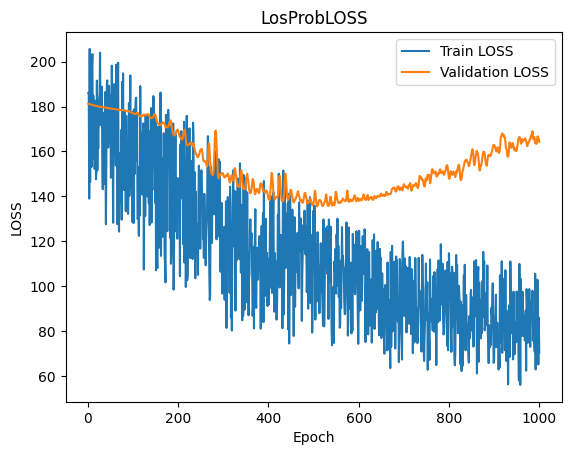

In [17]:
#plotting the Logprobloss after training
logprobloss=st.plot_loss(history_loss_train_file, history_loss_val_file, epoch_counter_train_loss_file)

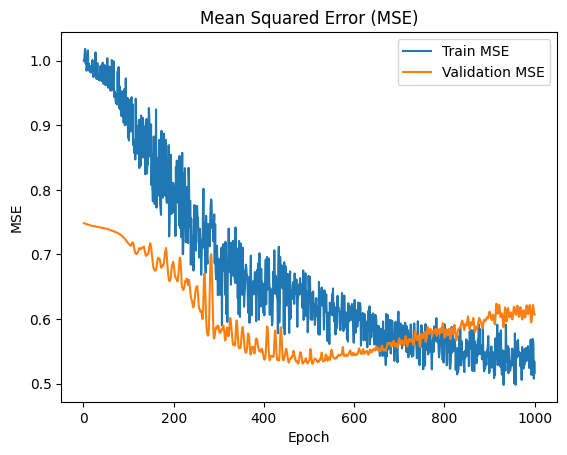

In [18]:
 # Replace with the path to your history_mse_train CSV file
history_mse_train_file = './history_mse_train.csv'
# Replace with the path to your history_mse_val CSV file
history_mse_val_file = './history_mse_val.csv'  
# Replace with the path to your epoch_counter_train_mse CSV file
epoch_counter_train_mse_file = './epoch_counter_train_mse.csv'  

#plotting the MSE metric after training
msemetric=st.plot_mse(history_mse_train_file, history_mse_val_file, epoch_counter_train_mse_file)


save=st.save_model(model, MODEL_PATH)#saving the trained model

In [36]:
#Importing PREDICTION_onePDF_original_mjd module from the package
from QNPy import PREDICTION_onePDF_original_mjd as pop
#Importing all packages from PREDICTION_onePDF_original_mjd module
from QNPy.PREDICTION_onePDF_original_mjd import * 
#The functions plot_function2, back_x, back_y and find_LC_transorm must be imported separately
from QNPy.PREDICTION_onePDF_original_mjd import plot_function2, back_x, back_y, find_LC_transform 

#defining the device, it can be cpu or cuda
device = torch.device("cpu")
device

# Creating all needed folders
# If you already manually created prediction folders, this can be scipped
pop.create_prediction_folders()


DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder
DATA_PATH_TEST="./dataset/test" #path to test folder
OUTPUT_PATH = "./output/predictions/" #path where to save the plots and data

MODEL_PATH = "./output/cnp_model.pth" #path to saved model

Folder already exists: ./output/predictions/train
Folder already exists: ./output/predictions/train/plots
Folder already exists: ./output/predictions/train/data
Folder already exists: ./output/predictions/test
Folder already exists: ./output/predictions/test/plots
Folder already exists: ./output/predictions/test/data
Folder already exists: ./output/predictions/val
Folder already exists: ./output/predictions/val/plots
Folder already exists: ./output/predictions/val/data


In [37]:
clearfolders=pop.clear_output_dir(OUTPUT_PATH)#clearing the output directorium, it can be sciped

model = pop.load_model(MODEL_PATH, device)#loading trained model

criterion, mseMetric=pop.get_criteria()#loading criterion adn metrics
#deleting the padded values from test set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/test"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)
#deleting the padded values from train set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/train"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)
#deleting the padded values from val set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/val"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: 3032591_original_split0.csv
Removed padding in file: 3152786_original_split18.csv
Removed padding in file: 2473812_original_split14.csv
Removed padding in file: 2524327_original_split3.csv
Removed padding in file: 2579983_original_split8.csv
Removed padding in file: 3078106_original_split9.csv
Removed padding in file: 3102202_original_split21.csv
Removed padding in file: 3104329_original_split11.csv
Removed padding in file: 3844725_original_split7.csv
Removed padding in file: 3097526_original_split29.csv


  0%|          | 0/2 [00:00<?, ?it/s]/home/iuliu/anaconda3/envs/agn/lib/python3.9/site-packages/QNPy/PREDICTION_onePDF_original_mjd.py:406: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
 50%|█████     | 1/2 [00:00<00:00,  3.71it/s]

100%|██████████| 2/2 [00:00<00:00,  4.76it/s]


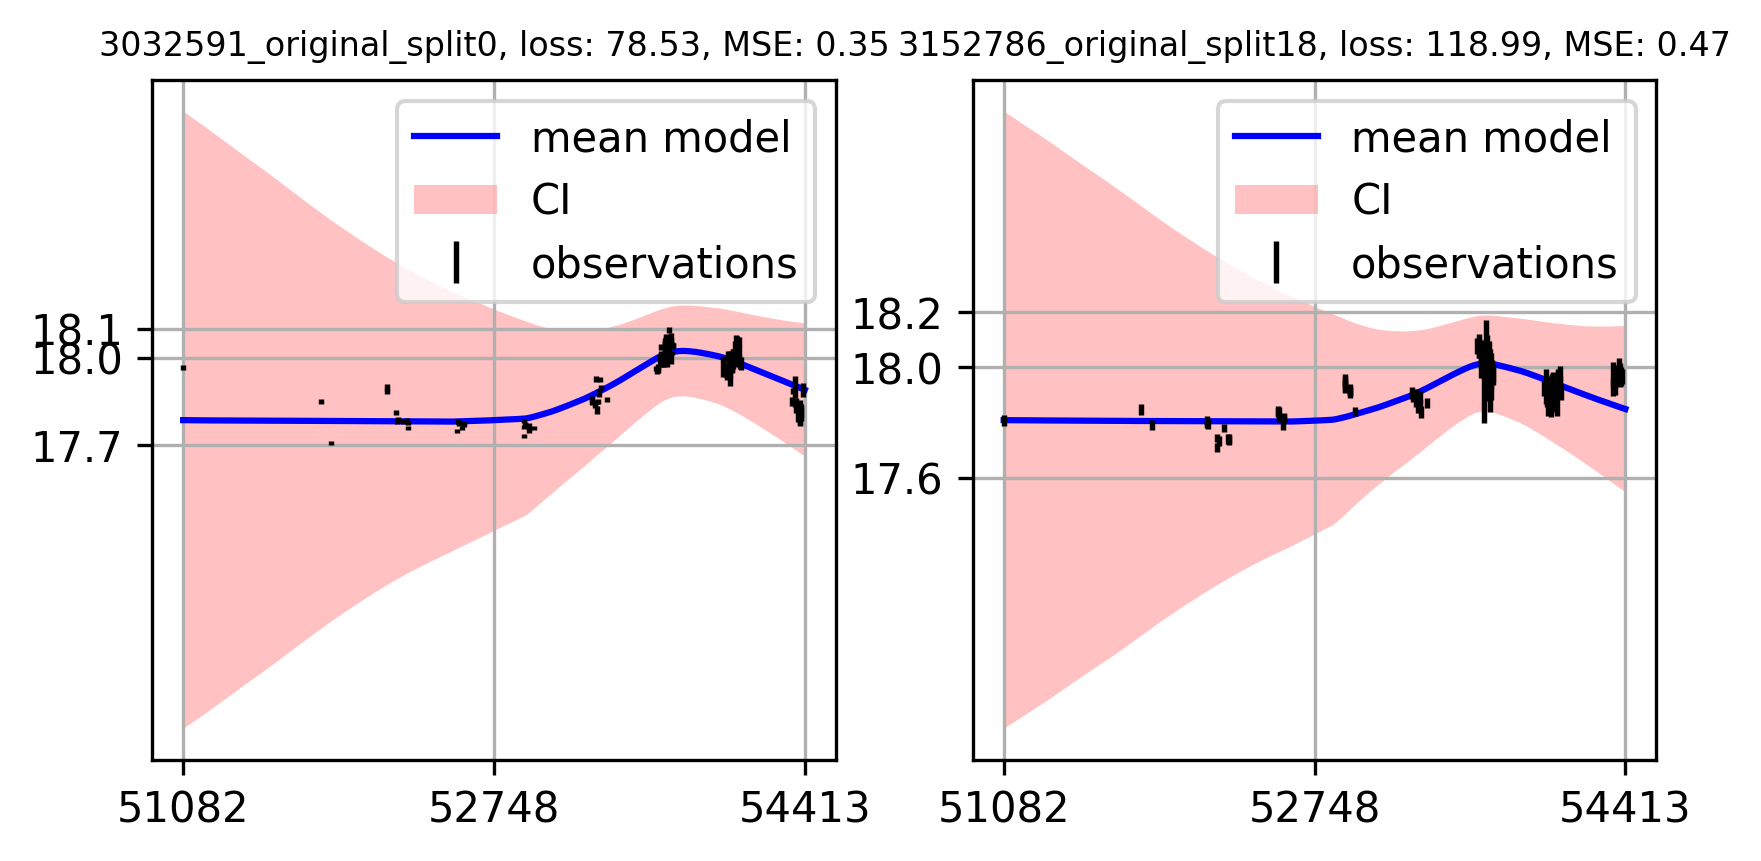

In [38]:
tr=pop.load_trcoeff()#loading the transformation coeff

testSet, testLoader=pop.load_test_data(DATA_PATH_TEST)#loading test data

trainSet, trainLoader=pop.load_train_data(DATA_PATH_TRAIN)#loading train data

valSet, valLoader = pop.load_val_data(DATA_PATH_VAL)#loading validation data

#prediction and plotting od test data
testMetrics=pop.plot_test_light_curves(model, testLoader, criterion, mseMetric, plot_function2, device,tr)

savetest=pop.save_test_metrics(OUTPUT_PATH, testMetrics)#saving the test metrics

  0%|          | 0/7 [00:00<?, ?it/s]/home/iuliu/anaconda3/envs/agn/lib/python3.9/site-packages/QNPy/PREDICTION_onePDF_original_mjd.py:524: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
 14%|█▍        | 1/7 [00:00<00:01,  3.98it/s]

 43%|████▎     | 3/7 [00:00<00:00,  4.99it/s]

 57%|█████▋    | 4/7 [00:00<00:00,  4.72it/s]

 86%|████████▌ | 6/7 [00:01<00:00,  4.95it/s]

100%|██████████| 7/7 [00:01<00:00,  4.86it/s]


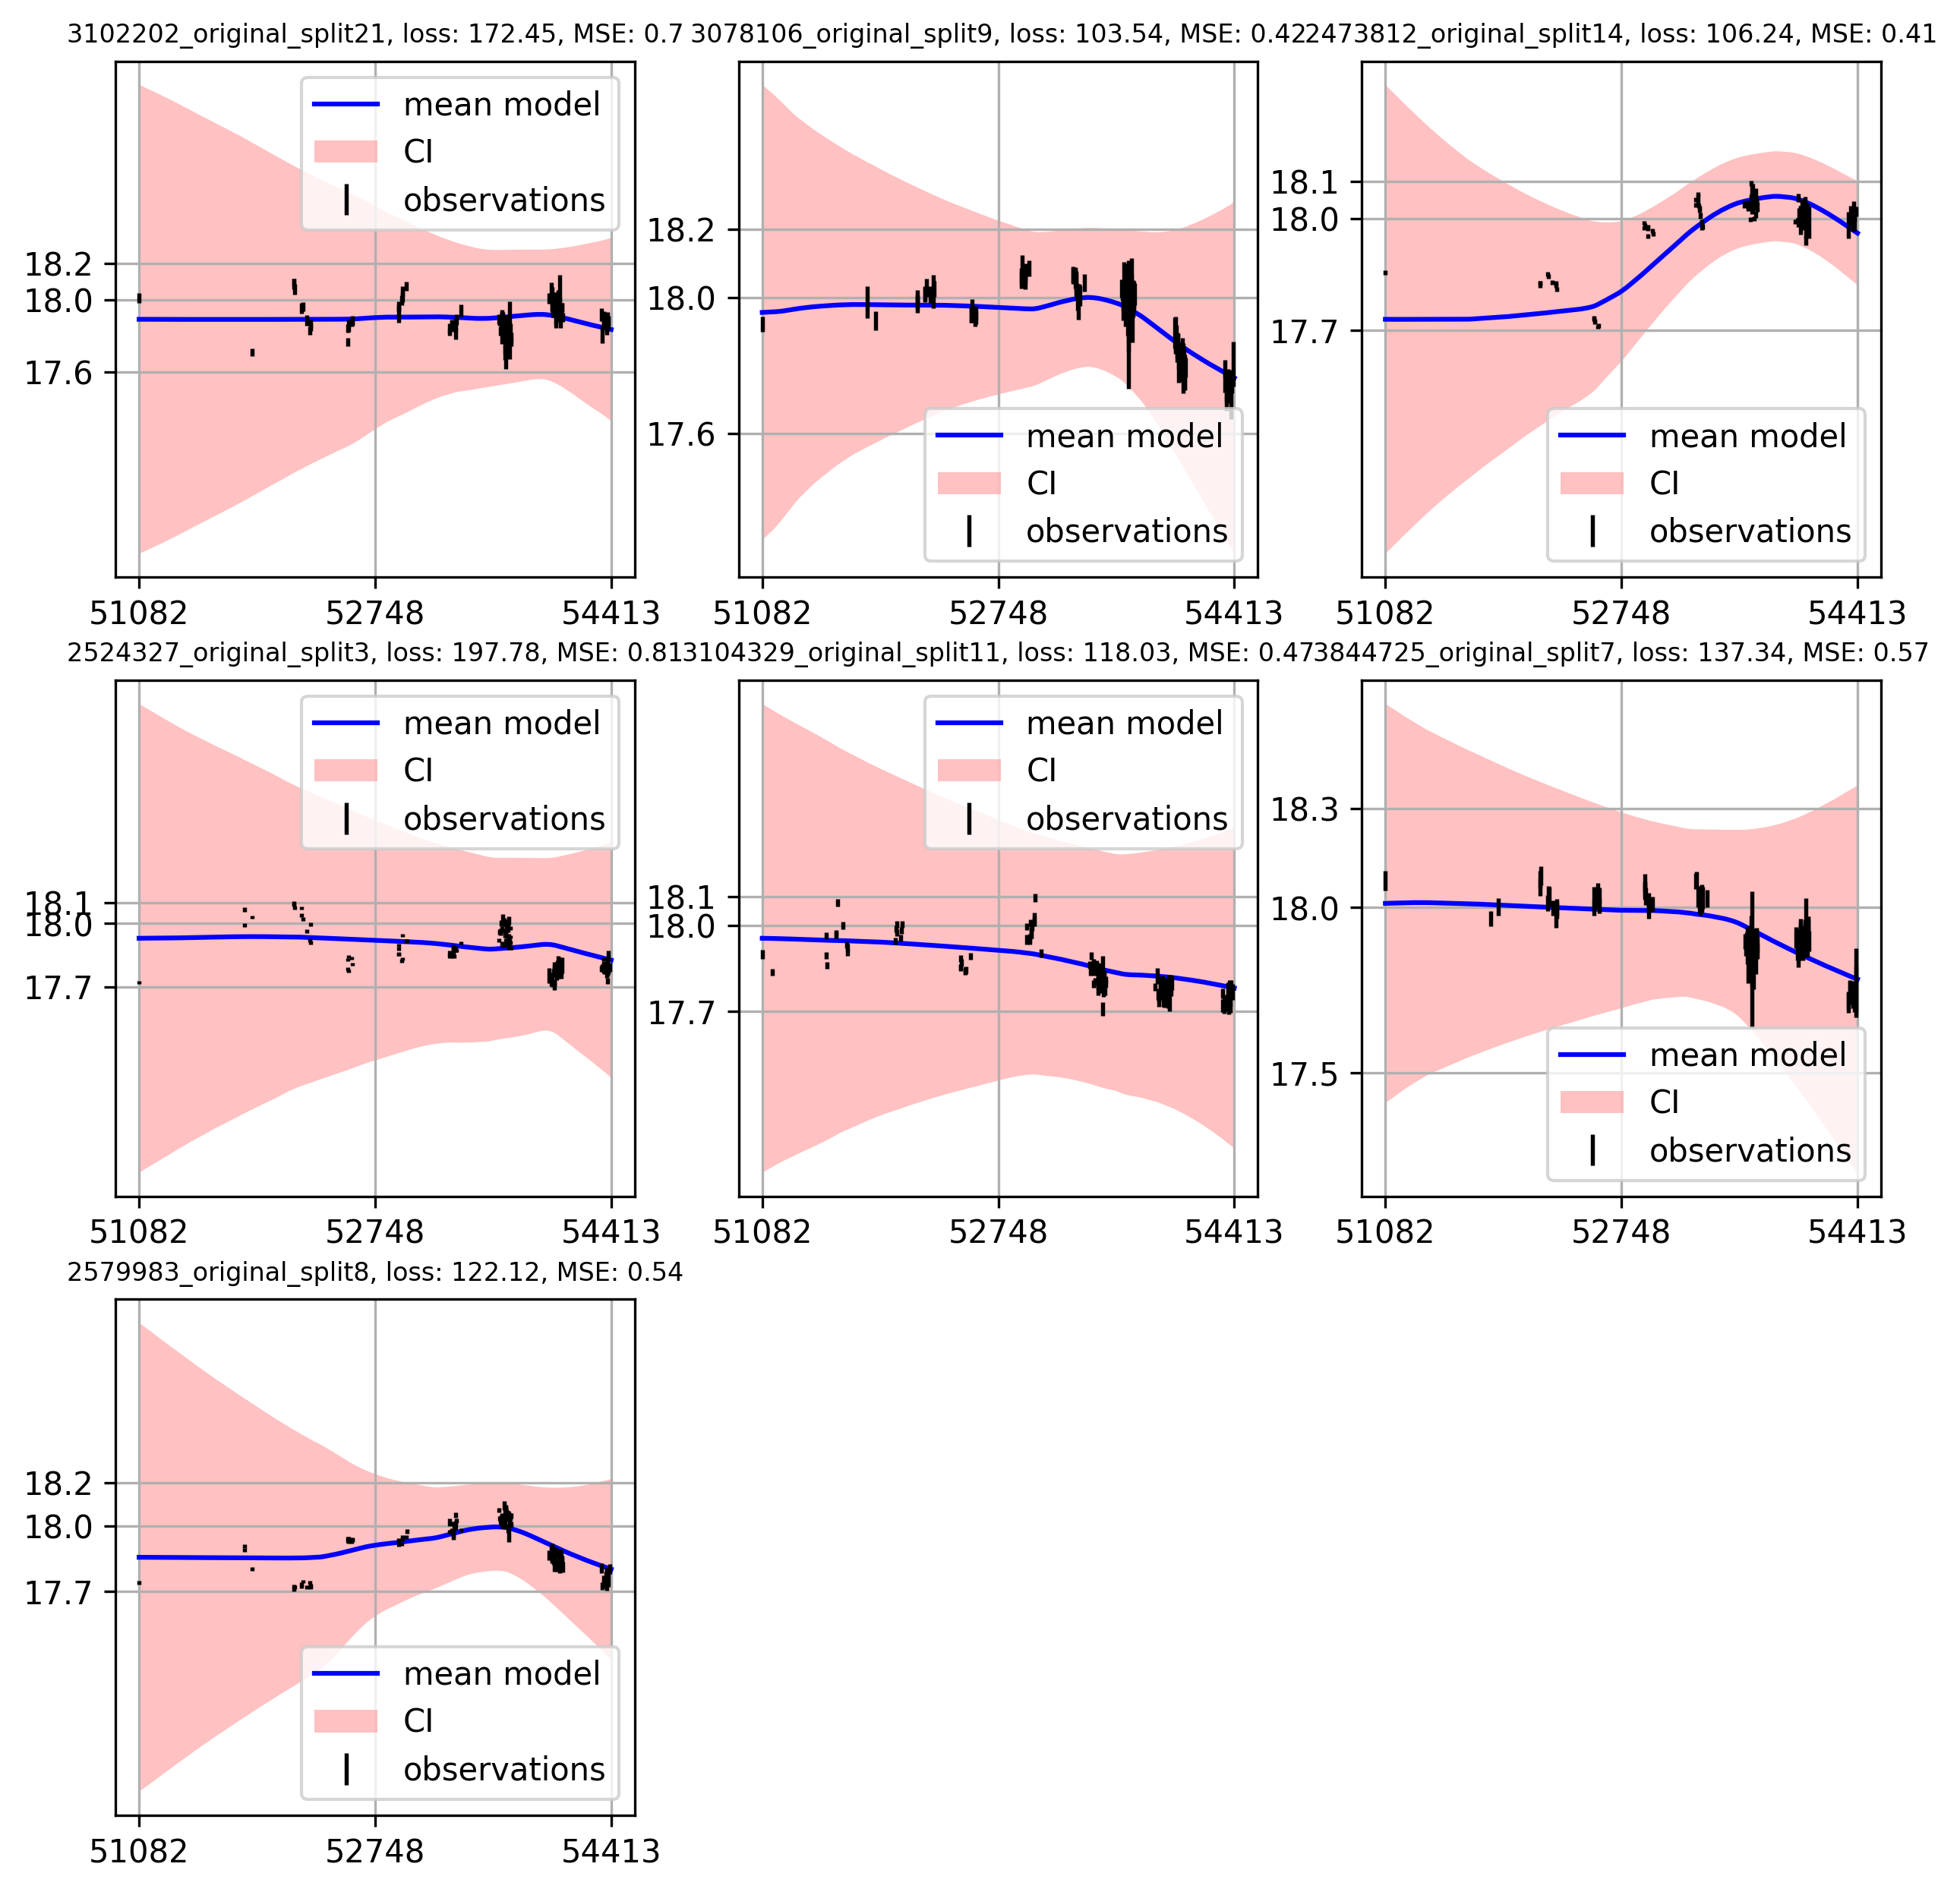

In [39]:
#prediction and plotting train data
trainMetrics=pop.plot_train_light_curves(model, trainLoader, criterion, mseMetric, plot_function2, device,tr)

savetrain=pop.save_train_metrics(OUTPUT_PATH, trainMetrics)#saving train metrics

  0%|          | 0/1 [00:00<?, ?it/s]/home/iuliu/anaconda3/envs/agn/lib/python3.9/site-packages/QNPy/PREDICTION_onePDF_original_mjd.py:643: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
100%|██████████| 1/1 [00:00<00:00,  6.25it/s]


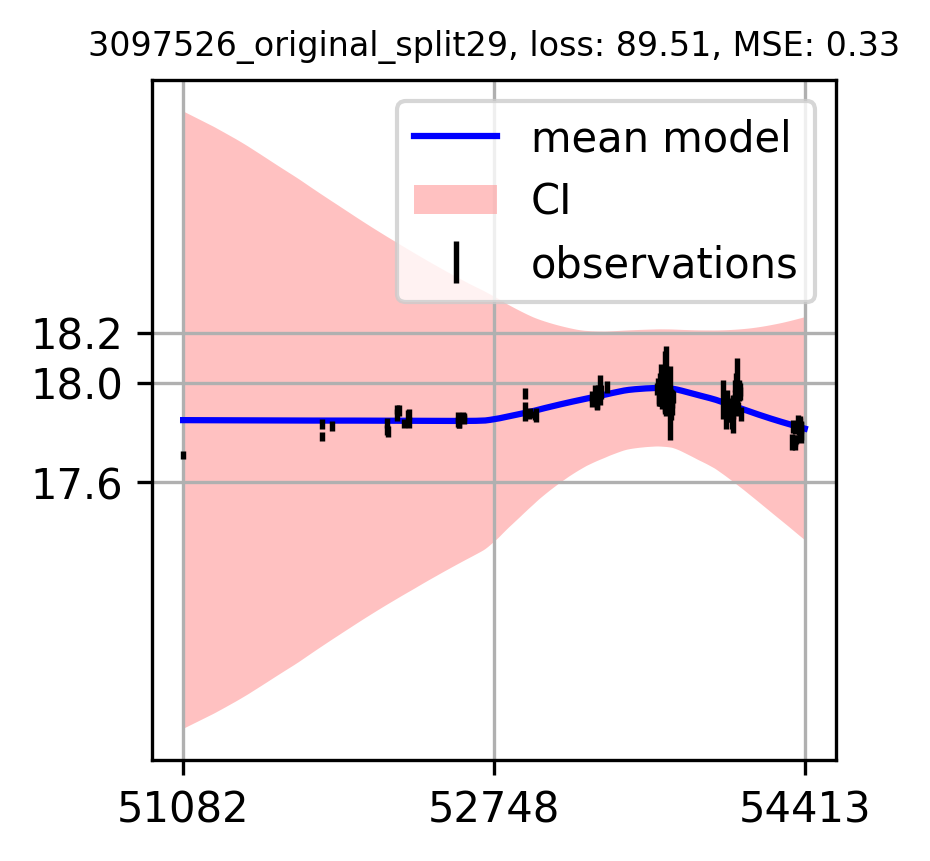

In [40]:

#prediction and plotting val data
valMetrics=pop.plot_val_light_curves(model, valLoader, criterion, mseMetric, plot_function2, device,tr)

saveval=pop.save_val_metrics(OUTPUT_PATH, valMetrics)#saving the val metrics